In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, hstack, vstack
from clevar.catalog import ClCatalog
from numpy.ma import masked
import sys
from clevar.match import output_matched_catalog

In [2]:
am_inpath = '/sps/lsst/groups/clusters/amico_validation_project/catalogs/amico_cats/amico_map_associations_flxzb_mag/Catalog_members_ls30_z115.fits'
rm_inpath = '/sps/lsst/users/tguillem/DESC/desc_april_2022/cluster_challenge/clevar_catalogs/redmapper/full_pmem_small/cosmoDC2_v1.1.4_redmapper_v0.8.1/Catalog_members.fits'
#cdc_inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/cosmoDC2_v1.1.4_small/m13/Catalog_members.fits"

In [3]:
am_mb = Table.read(am_inpath)
rm_mb = Table.read(rm_inpath)
#cdc_mb = Table.read(cdc_inpath)

In [4]:
inpath = "/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/"
supertable = Table.read('/sps/lsst/groups/clusters/amico_validation_project/catalogs/matching_cats/psupercatalog.fits')

In [5]:
supertable

cat12-1_id,cat12-1_ra,cat12-1_dec,cat12-1_z,cat12-1_mass,cat12-1_mt_self,cat12-1_mt_other,cat12-1_mt_multi_self,cat12-1_mt_multi_other,cat12-1_mt_cross,cat12-2_id,cat12-2_ra,cat12-2_dec,cat12-2_z,cat12-2_mass,cat12-2_z_true,cat12-2_log_mass,cat12-2_mt_self,cat12-2_mt_other,cat12-2_mt_multi_self,cat12-2_mt_multi_other,cat12-2_mt_cross,cat13-1_id,cat13-1_ra,cat13-1_dec,cat13-1_z,cat13-1_mass,cat13-1_mt_self,cat13-1_mt_other,cat13-1_mt_multi_self,cat13-1_mt_multi_other,cat13-1_mt_cross,cat13-3_id,cat13-3_ra,cat13-3_dec,cat13-3_z,cat13-3_mass,cat13-3_log_mass,cat13-3_mt_self,cat13-3_mt_other,cat13-3_mt_multi_self,cat13-3_mt_multi_other,cat13-3_mt_cross,cat23-2_id,cat23-2_ra,cat23-2_dec,cat23-2_z,cat23-2_mass,cat23-2_z_true,cat23-2_log_mass,cat23-2_mt_self,cat23-2_mt_other,cat23-2_mt_multi_self,cat23-2_mt_multi_other,cat23-2_mt_cross,cat23-3_id,cat23-3_ra,cat23-3_dec,cat23-3_z,cat23-3_mass,cat23-3_log_mass,cat23-3_mt_self,cat23-3_mt_other,cat23-3_mt_multi_self,cat23-3_mt_multi_other,cat23-3_mt_cross
bytes32,float64,float64,float64,float64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes32,float64,float64,float64,float64,float64,float64,bytes32,bytes32,bytes32,bytes32,bytes32,bytes6,float64,float64,float32,float64,bytes13,bytes13,bytes123,bytes123,bytes13,bytes21,float64,float64,float64,float64,float64,bytes5,bytes5,bytes11,bytes11,bytes5,bytes32,float64,float64,float64,float64,float64,float64,bytes32,bytes32,bytes95,bytes95,bytes32,bytes32,float64,float64,float64,float64,float64,bytes32,bytes32,bytes32,bytes32,bytes32
1,61.379151,-39.997938,0.7599999904632568,151.05119,16,16,16,16,16,16,61.38091042723989,-39.995134303962544,0.7516999840736389,167.76316833496094,0.752255380153656,2.224696636199951,1,1,1,1,1,1,61.379151,-39.997938,0.76,151.05119,935700155279,935700155279,935700155279,935700155279,935700155279,935700155279,61.38091042723989,-39.995134303962544,0.7522553689872022,1328346332168653.5,15.123311320920747,1,1,1,1,1,26,67.04118044229672,-36.65553761954279,0.9107077717781067,140.76185607910156,0.9010045528411865,2.148484945297241,1780800129259,1780800129259,"1730400129259,1780800129259,230300129235","1730400129259,1780800129259,230300129235",1780800129259,1780800129259,67.04118044229672,-36.65553761954279,0.9010045725149554,528315382515740.9,14.72289325585909,26,26,26,26,26
2,61.751903,-39.598934,0.38999998569488525,34.635494,1448,1448,1448,1448,1448,1448,61.75471518763446,-39.59505755309435,0.3823624551296234,40.7655029296875,0.37716925144195557,1.6102927923202515,2,2,2,2,2,2,61.751903,-39.598934,0.39,34.635494,268600155355,268600155355,268600155355,268600155355,268600155355,268600155355,61.75471518763446,-39.59505755309435,0.3771692378505265,455114262418388.75,14.658120445685581,2,2,2,2,2,54,68.58519520148329,-37.06286568615487,0.5412348508834839,117.28445434570312,0.5372703075408936,2.0692405700683594,68900129323,68900129323,68900129323,68900129323,68900129323,68900129323,68.58519520148329,-37.06286568615487,0.5372703073067269,361786839559211.3,14.55845276481576,54,54,54,54,54
3,62.020461,-40.78391,0.7599999904632568,65.485061,492,492,492,492,492,492,62.01743687819776,-40.78463556638627,0.750578761100769,56.295066833496094,0.7545040249824524,1.7504703998565674,3,3,3,3,3,3,62.020461,-40.78391,0.76,65.485061,1617600155279,1617600155279,1617600155279,1617600155279,1617600155279,1617600155279,62.01743687819776,-40.78463556638627,0.7545040319883065,265194735875605.66,14.423564899058276,3,3,3,3,3,93,66.52163526817355,-40.49730464002901,0.5698791146278381,106.65174102783203,0.5711850523948669,2.027967929840088,804700157315,804700157315,"155300157307,804700157315,1471200157307","1471200157307,155300157307,804700157315",804700157315,804700157315,66.52163526817355,-40.49730464002901,0.5711850461607995,378651013523831.0,14.578239123625224,93,93,93,93,93
4,62.622221,-40.86162,0.25999999046325684,35.691697,1912,1912,1912,1912,1912,1912,62.62391149797296,-40.859322057033374,0.2515519857406616,32.28373718261719,0.24752603471279144,1.5089838

In [6]:
supertable12 = supertable[supertable['cat12-1_z']>0]
supertable13 = supertable[supertable['cat13-1_z']>0]
supertable23 = supertable[supertable['cat23-2_z']>0]

In [7]:
rm_mb

id,id_cluster,ra,dec,pmem,mag_r,mag_i,mag_z
int64,int32,float64,float64,float32,float32,float32,float32
8064212696,26,67.04118044229672,-36.65553761954279,0.99921656,21.258728,20.214851,19.428509
8064240727,26,67.03971963378734,-36.65522571193022,0.99659103,23.312243,22.278286,21.518162
8064212769,26,67.0415493650172,-36.65687792864976,0.9989721,22.716715,21.634148,20.81336
8064240664,26,67.04093102342418,-36.65698236318693,0.99861884,23.124426,22.082472,21.257294
8064240703,26,67.0412281651421,-36.65717961161655,0.99695486,23.376398,22.281954,21.472717
8064240699,26,67.03983980902925,-36.65398719537674,0.9703774,23.295563,22.234524,21.610706
8064240721,26,67.04364312566005,-36.655242414144816,0.9978006,23.18554,22.158426,21.370802
8064240717,26,67.03912052150015,-36.65679793512189,0.9394761,23.624811,22.641552,21.84039
8064240657,26,67.04217981617906,-36.65324525966428,0.969031,23.6376,22.695902,21.918003


In [8]:
supertable12['cat12-1_id'] = supertable12['cat12-1_id'].astype(int)
supertable12['cat12-2_id'] = supertable12['cat12-2_id'].astype(int)

In [9]:
am_mb['matched'] = np.array([i in supertable12['cat12-1_id'] for i in am_mb['id_cluster']])
rm_mb['matched'] = np.array([i in supertable12['cat12-2_id'] for i in rm_mb['id_cluster']])

In [10]:
rm_mb[rm_mb['matched']==True]

id,id_cluster,ra,dec,pmem,mag_r,mag_i,mag_z,matched
int64,int32,float64,float64,float32,float32,float32,float32,bool
8064212696,26,67.04118044229672,-36.65553761954279,0.99921656,21.258728,20.214851,19.428509,True
8064240727,26,67.03971963378734,-36.65522571193022,0.99659103,23.312243,22.278286,21.518162,True
8064212769,26,67.0415493650172,-36.65687792864976,0.9989721,22.716715,21.634148,20.81336,True
8064240664,26,67.04093102342418,-36.65698236318693,0.99861884,23.124426,22.082472,21.257294,True
8064240703,26,67.0412281651421,-36.65717961161655,0.99695486,23.376398,22.281954,21.472717,True
8064240699,26,67.03983980902925,-36.65398719537674,0.9703774,23.295563,22.234524,21.610706,True
8064240721,26,67.04364312566005,-36.655242414144816,0.9978006,23.18554,22.158426,21.370802,True
8064240717,26,67.03912052150015,-36.65679793512189,0.9394761,23.624811,22.641552,21.84039,True
8064240657,26,67.04217981617906,-36.65324525966428,0.969031,23.6376,22.695902,21.918003,True


In [11]:
z_min, z_max = .5, .8

In [12]:
rm_cl = supertable12['cat12-2_id']
rm_mb['z' ]= 0.0
for cl in rm_cl:
    rm_mb['z'][rm_mb['id_cluster']==cl] = supertable12[supertable12['cat12-2_id']==cl]['cat12-2_z']

In [13]:
rm_mb_12 = rm_mb[rm_mb['matched']==True]

In [14]:
rm_mb_delt = rm_mb_12[(rm_mb_12['z']>z_min)*(rm_mb_12['z']<z_max)]['mag_r'] - rm_mb_12[(rm_mb_12['z']>z_min)*(rm_mb_12['z']<z_max)]['mag_i']

In [15]:
am_mb_12 = am_mb[am_mb['matched']==True]

In [16]:
am_mb_delt = am_mb_12[(am_mb_12['z']>z_min)*(am_mb_12['z']<z_max)]['mag_r'] - am_mb_12[(am_mb_12['z']>z_min)*(am_mb_12['z']<z_max)]['mag_i']

In [17]:
x_bins = np.linspace(20,26.5,15)
y_bins = np.linspace(-0.1,1.3,15)

In [18]:
am_hist = np.histogram2d(am_mb_12[(am_mb_12['z']>z_min)*(am_mb_12['z']<z_max)]['mag_i'], am_mb_delt, bins = (x_bins,y_bins))
rm_hist = np.histogram2d(rm_mb_12[(rm_mb_12['z']>z_min)*(rm_mb_12['z']<z_max)]['mag_i'], rm_mb_delt, bins = (x_bins,y_bins))

In [19]:
am_hist = am_hist[0]
rm_hist = rm_hist[0]

In [20]:
am_hist[am_hist==0] = np.nan
rm_hist[rm_hist==0] = np.nan
x, y = np.meshgrid(x_bins, y_bins)

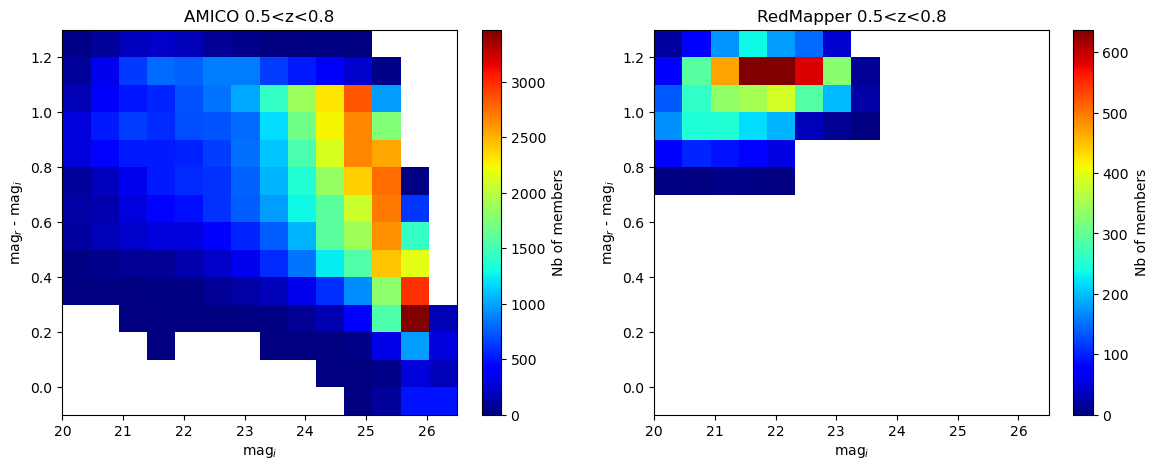

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,5))
#print(x)
#print(y)
c = ax1.pcolormesh(x, y, am_hist.T, cmap='jet', vmin=0)
ax1.set_xlabel('mag$_i$')
ax1.set_ylabel('mag$_r$ - mag$_i$')
ax1.set_title('AMICO ' + str(z_min) + '<z<' + str(z_max))
c1 = ax2.pcolormesh(x, y, rm_hist.T, cmap='jet', vmin=0)
ax2.set_xlabel('mag$_i$')
ax2.set_ylabel('mag$_r$ - mag$_i$')
ax2.set_title('RedMapper ' + str(z_min) + '<z<' + str(z_max))
fig.colorbar(c, ax=ax1, label = 'Nb of members')
fig.colorbar(c1, ax=ax2, label = 'Nb of members')